# 👾 PixelCNN using Tensorflow distributions

In this notebook, we'll walk through the steps required to train your own PixelCNN on the fashion MNIST dataset using Tensorflow distributions

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
import tensorflow_probability as tfp

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))
from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [2]:
IMAGE_SIZE = 32
N_COMPONENTS = 5
EPOCHS = 10
BATCH_SIZE = 128

## 1. Prepare the data <a name="prepare"></a>

In [3]:
# Load the data
(x_train, _), (_, _) = datasets.fashion_mnist.load_data()

In [4]:
# Preprocess the data


def preprocess(imgs):
    imgs = np.expand_dims(imgs, -1)
    imgs = tf.image.resize(imgs, (IMAGE_SIZE, IMAGE_SIZE)).numpy()
    return imgs


input_data = preprocess(x_train)

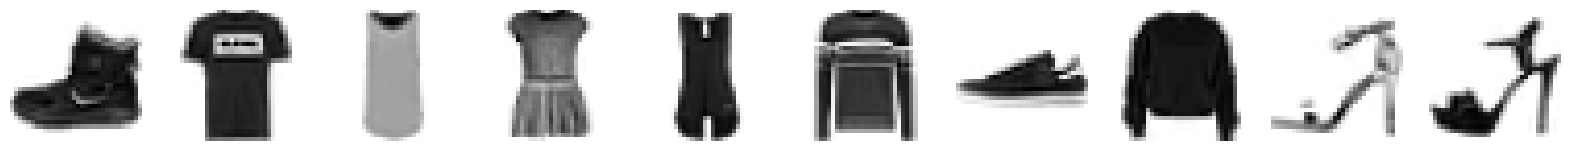

In [5]:
# Show some items of clothing from the training set
display(input_data)

## 2. Build the PixelCNN <a name="build"></a>

In [6]:
# Define a Pixel CNN network
dist = tfp.distributions.PixelCNN(
    image_shape=(IMAGE_SIZE, IMAGE_SIZE, 1),
    num_resnet=1,
    num_hierarchies=2,
    num_filters=32,
    num_logistic_mix=N_COMPONENTS,
    dropout_p=0.3,
)

# Define the model input
image_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# Define the log likelihood for the loss fn
log_prob = dist.log_prob(image_input)

# Define the model
pixelcnn = models.Model(inputs=image_input, outputs=log_prob)
pixelcnn.add_loss(-tf.reduce_mean(log_prob))

## 3. Train the PixelCNN <a name="train"></a>

In [7]:
# Compile and train the model
pixelcnn.compile(
    optimizer=optimizers.Adam(0.001),
)

In [8]:
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")


class ImageGenerator(callbacks.Callback):
    def __init__(self, num_img):
        self.num_img = num_img

    def generate(self):
        return dist.sample(self.num_img).numpy()

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.generate()
        display(
            generated_images,
            n=self.num_img,
            save_to="./output/generated_img_%03d.png" % (epoch),
        )


img_generator_callback = ImageGenerator(num_img=2)

Layer _PixelCNNNetwork has arguments ['dropout_p', 'num_resnet', 'num_hierarchies', 'num_filters', 'num_logistic_mix', 'receptive_field_dims', 'resnet_activation', 'use_weight_norm', 'use_data_init']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 2334.8196  
Saved to ./output/generated_img_000.png


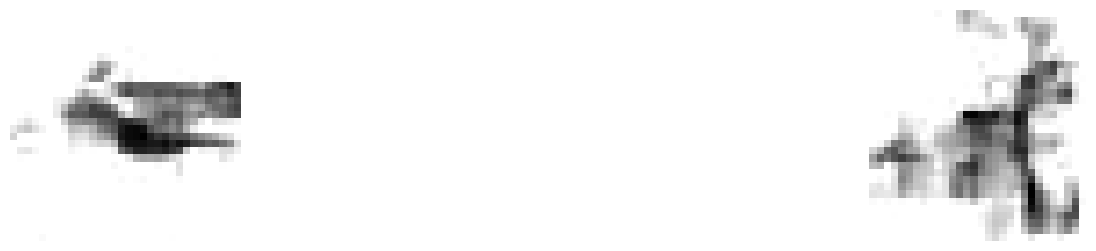

469/469 [==============================] - 182s 361ms/step - loss: 2334.8196
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 2055.0942  
Saved to ./output/generated_img_001.png


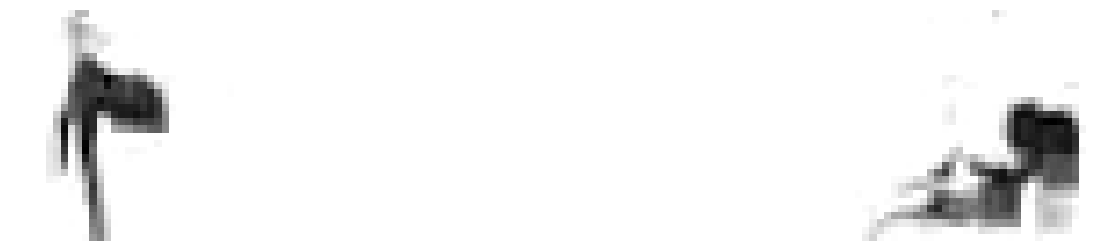

469/469 [==============================] - 167s 356ms/step - loss: 2055.0942
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 1974.9131  
Saved to ./output/generated_img_002.png


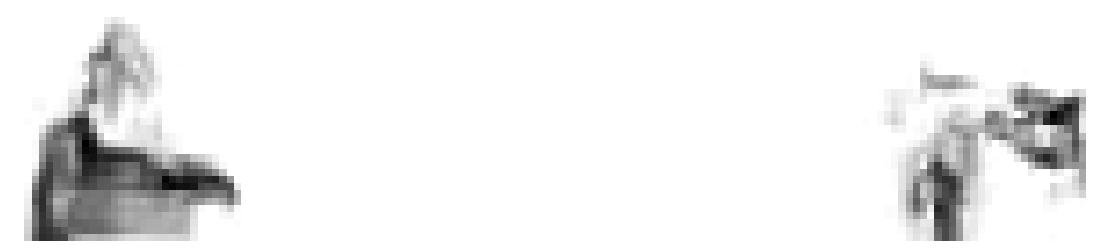

469/469 [==============================] - 169s 361ms/step - loss: 1974.9131
Epoch 4/10
469/469 [==============================] - ETA: 0s - loss: 1920.9463  
Saved to ./output/generated_img_003.png


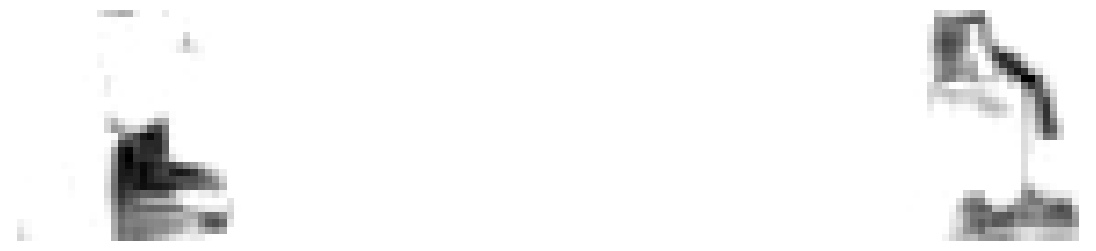

469/469 [==============================] - 172s 368ms/step - loss: 1920.9463
Epoch 5/10
469/469 [==============================] - ETA: 0s - loss: 1883.0774  
Saved to ./output/generated_img_004.png


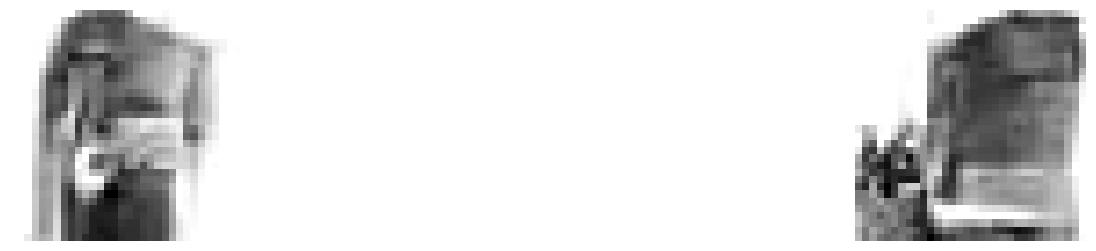

469/469 [==============================] - 177s 378ms/step - loss: 1883.0774
Epoch 6/10
469/469 [==============================] - ETA: 0s - loss: 1858.5699  
Saved to ./output/generated_img_005.png


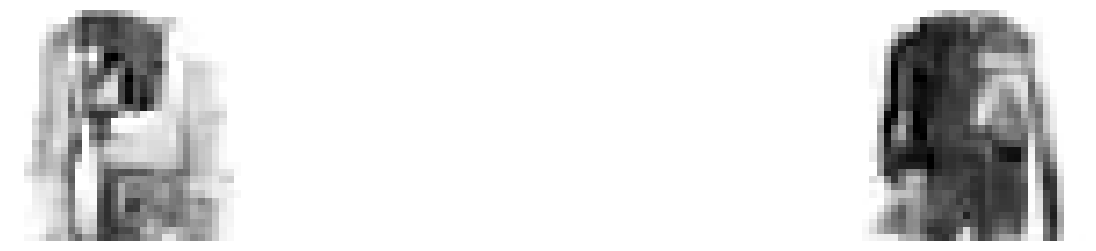

469/469 [==============================] - 173s 368ms/step - loss: 1858.5699
Epoch 7/10
469/469 [==============================] - ETA: 0s - loss: 1833.4358  
Saved to ./output/generated_img_006.png


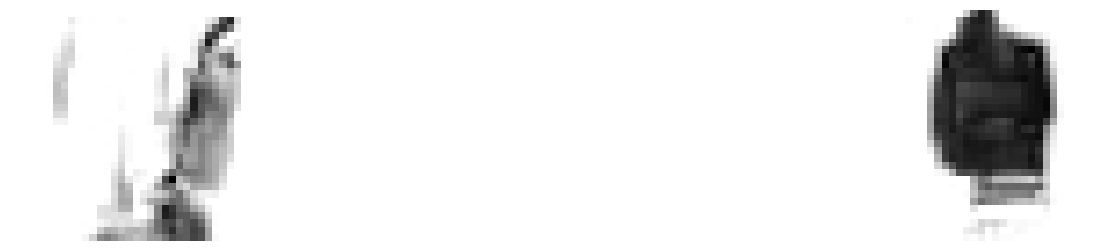

469/469 [==============================] - 171s 364ms/step - loss: 1833.4358
Epoch 8/10
469/469 [==============================] - ETA: 0s - loss: 1818.4430  
Saved to ./output/generated_img_007.png


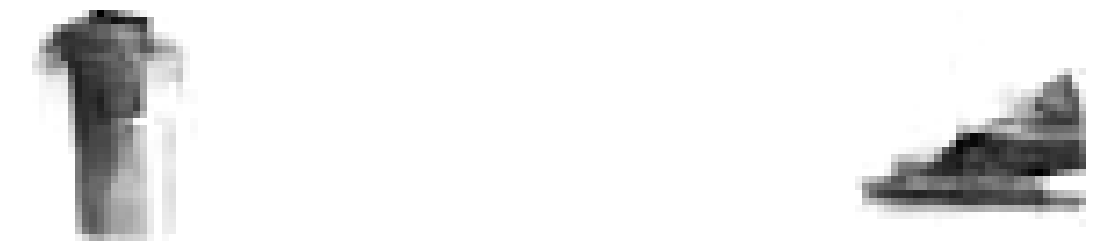

469/469 [==============================] - 170s 362ms/step - loss: 1818.4430
Epoch 9/10
469/469 [==============================] - ETA: 0s - loss: 1801.4890  
Saved to ./output/generated_img_008.png


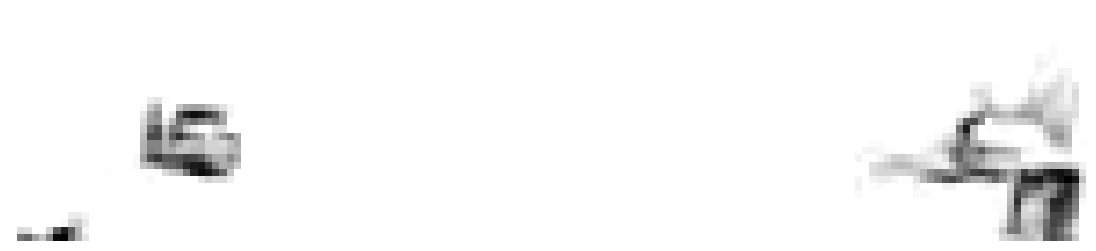

469/469 [==============================] - 171s 365ms/step - loss: 1801.4890
Epoch 10/10
469/469 [==============================] - ETA: 0s - loss: 1788.2322  
Saved to ./output/generated_img_009.png


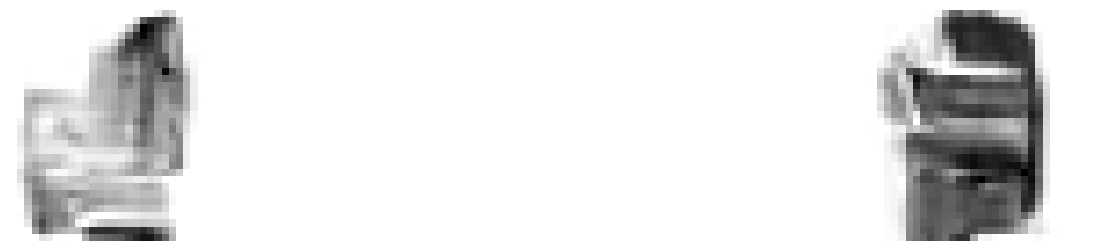

469/469 [==============================] - 172s 366ms/step - loss: 1788.2322


In [9]:
pixelcnn.fit(
    input_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=True,
    callbacks=[tensorboard_callback, img_generator_callback],
)

## 4. Generate images <a name="generate"></a>

In [10]:
generated_images = img_generator_callback.generate()

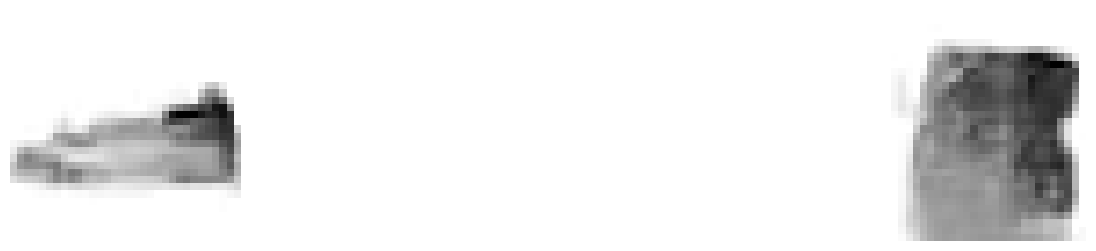

In [11]:
display(generated_images, n=img_generator_callback.num_img)